### Student Information
Name: 賴迎曦

Student ID: b09303065

GitHub ID: dina496

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

### Second part

In [1]:
import requests
from huggingface_hub import configure_http_backend
# Customized HTTP backend session
def backend_factory() -> requests.Session:
    session = requests.Session()
    session.verify = False # disable SSL certificate verification
    return session
configure_http_backend(backend_factory = backend_factory)

In [2]:
# Download dataset
# Add the egg path to the dataset library 
import sys
egg_path = '__MODULE_PATH__/datasets-0.0.9-py3.5.egg'
sys.path.append(egg_path)
# Load dataset
import datasets
from datasets import load_dataset
ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'huggingface.co'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 's3.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'huggingface.co'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/adva

#### Data Preparation
**Exercise 1**: Print out the text data for the first three samples in the dataset.

In [3]:
for text in ds['train'].select(range(10)):
    print(text['comment'])

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.
30 day leave from 1st tour in Viet Nam to convince my Mary Lou to "marry me" when I came back from my 2nd tour.  Now, 47 years later this December God granted the greatest blessing a man can receive.  This son

#### Data Transformation
**Exercise 2**: Experiment with other querying techniques using pandas dataframes.

In [4]:
import helpers.data_mining_helpers as dmh
from helpers.data_mining_helpers import format_rows
import pandas as pd
df_pd = pd.DataFrame(ds['train'])
df_pd[df_pd['sentiment'].isin(['nostalgia'])]

sentiment                                            comment
1     nostalgia  The mist beautiful voice ever I listened to hi...
2     nostalgia  I have most of Mr. Reeves songs.  Always love ...
4     nostalgia  listening to his songs reminds me of my mum wh...
5     nostalgia  Every time I heard this song as a child, I use...
6     nostalgia  My dad loved listening to Jim Reeves, when I w...
...         ...                                                ...
1488  nostalgia  Yup !!!!  Bringing back an Enormous amount of ...
1491  nostalgia  real music...how i miss those days...brings ba...
1492  nostalgia  i used to cry over this song cause i had a boy...
1498  nostalgia  I was born in 1954 and started to be aware of ...
1499  nostalgia  This is the first CD I bought after my marriag...

[750 rows x 2 columns]

**Exercise 3**: Try to fetch records belonging to the `nostalgia` category, and query every 10th record. Only show the first 5 records.

In [5]:
print(df_pd[df_pd['sentiment'] == 'nostalgia'].iloc[::10][0:5])

    sentiment                                            comment
1   nostalgia  The mist beautiful voice ever I listened to hi...
18  nostalgia  My Grandparents had a pub in the 1970's, this ...
32  nostalgia  I remember my Mom listening to Jim over and ov...
50  nostalgia  If I remember correctly, this song came out af...
71  nostalgia  Gosh does this bring back memories. Nearly eve...


#### Data Mining using Pandas
**Exercise 4**: Calculate the missing values in every record instead of every column.

In [6]:
df_pd.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

**Exercise 5**: Please check the data and the process below, describe what you observe and why it happened.

* Since it is already done in Part 1, I will check if there is any missing data in the dataset instead.

In [7]:
import numpy as np
df_pd['comment'].isnull() # check each row if there are missing values

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Name: comment, Length: 1500, dtype: bool

In [8]:
# Check if there is any missing data in the entire dataset
print(df_pd.isnull().values.any())

False


#### Data Preprocessing
**Exercise 6**: Notice any changes from the `X dataframe` to the `X_sample dataframe`? What are they? Report every change you noticed as compared to the previous state of `X`.
In this question, I compare `df_pd` and `df_sample` instead.

In [9]:
from IPython.display import display
df_sample = df_pd.sample(n = 500).reset_index(drop = True) # random state
display(df_pd.loc[:10, 'comment'])
display(df_sample.loc[:10, 'comment'])

0     He was a singer with a golden voice that I lov...
1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
3     30 day leave from 1st tour in Viet Nam to conv...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
Name: comment, dtype: object

0     Funny, but so many generations an say this abo...
1     This throw back classic is still hanging on in...
2     What a brilliant piece of vocal art. Time to d...
3     It was the record that was playing on the radi...
4     Evokes wonderful memories for me, I was twenty...
5     This song actually, reminds me of my family an...
6     listen to this song, remember childhood, and m...
7     I'm reading Pete's autobiography now (well, li...
8     my sister played this to me when i was a child...
9     I had the audio cassette as a child. First rap...
10    i used to cry over this song cause i had a boy...
Name: comment, dtype: object

`df_sample` extracts 500 data randomly (not aligned with the index of the original dataset `df_pd`)

**Exercise 7**: Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that?

sentiment
not nostalgia    252
nostalgia        248
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

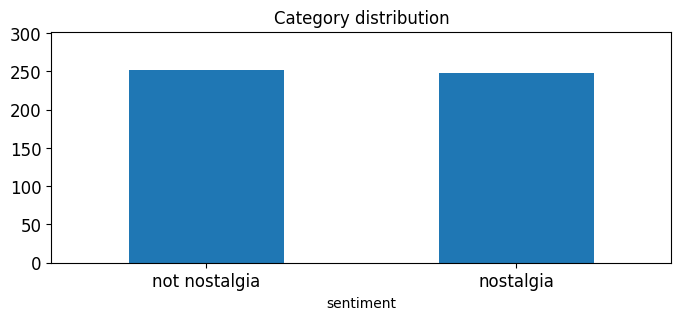

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
# Automating the maximum value for the y-axis
upper_bound = max(df_sample.sentiment.value_counts() + 50)
# Show object counts of each category in sentiment
print(df_sample.sentiment.value_counts())
# Plotting category distribution
plt.style.use('default')
df_sample.sentiment.value_counts().plot(kind = 'bar',
                                            title = 'Category distribution', 
                                            ylim = [0, upper_bound], 
                                            rot = 0, fontsize = 12, figsize = (8, 3))

**Exercise 8**: We can also do a **side-by-side comparison** of the distribution between the two datasets, but maybe you can try that as an excerise

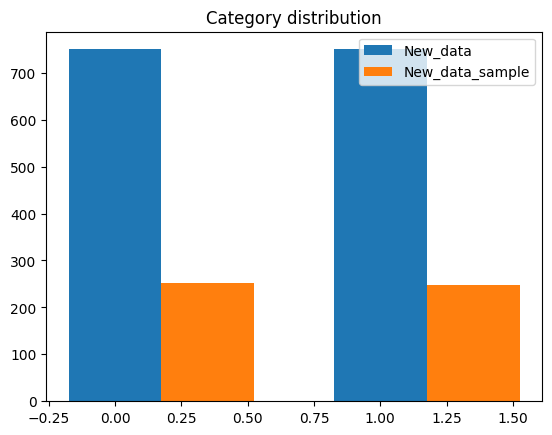

In [11]:
# Counting category occurrences
vc_df = df_pd['sentiment'].value_counts()
vc_df_sample = df_sample['sentiment'].value_counts()
# DataFrame for comparison
df_pd2 = pd.DataFrame({'New_data': vc_df, 'New_data_sample': vc_df_sample}).fillna(0)
# Plotting side-by-side bar chart
plt.bar(range(len(df_pd2)), df_pd2['New_data'], 0.35, label = 'New_data')
plt.bar([i + 0.35 for i in range(len(df_pd2))], df_pd2['New_data_sample'], 0.35, label = 'New_data_sample')
plt.title('Category distribution')
plt.legend()
plt.show()

**Exercise 9**: Let's analyze the first record of our X dataframe with the new analyzer we have just built.
I use `df_pd` instead.

In [12]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import helpers.data_mining_helpers as dmh
# Tokenize texts
df_pd['unigrams'] = df_pd['comment'].apply(lambda x: dmh.tokenize_text(x))

In [13]:
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df_pd.comment) # learn the vocabulary and return document-term matrix

In [14]:
# Tokenization, show the first record
analyze = count_vect.build_analyzer()
analyze(df_pd.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

**Exercise 10**: We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.
I change the question to the **1** in the fourth record instead.

In [15]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [16]:
count_vect.get_feature_names_out()[df_counts[3:4, 0:100].nonzero()[1][1]]

'1st'

**Exercise 11**: From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with FREQUENCY of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

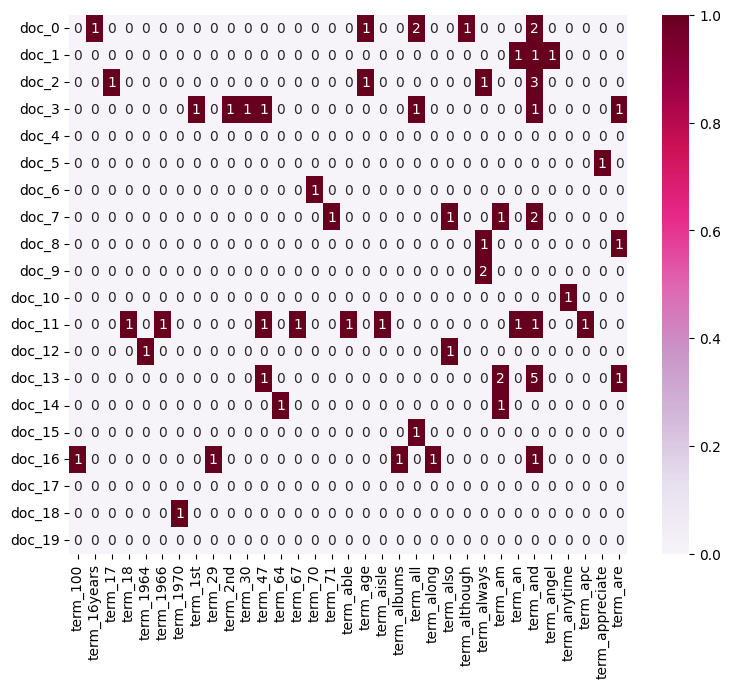

In [17]:
import seaborn as sns
# Prepare labels
plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[0:300]]
plot_y = ["doc_" + str(i) for i in list(df_pd.index)[0:20]]
plot_z = df_counts[0:20, 0:300].toarray()
# DataFrame for visualization
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
df_filtered = df_todraw.loc[:, (plot_z != 0).any(axis = 0)] # filter out 0 columns
plt.subplots(figsize = (9, 7))
# Create heatmap
ax = sns.heatmap(df_filtered,
                 cmap = "PuRd",
                 vmin = 0, vmax = 1, annot = True)

**Exercise 12**: If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

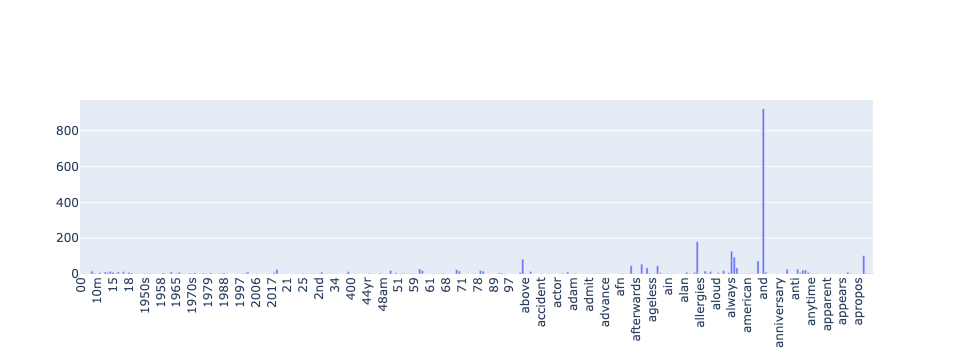

In [18]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# Compute term frequencies
term_frequencies = []
for j in range(0, df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))
term_frequencies = np.asarray(df_counts.sum(axis = 0))[0]

# Draw bar plot by plotly
fig = go.Figure([go.Bar(x = count_vect.get_feature_names_out()[:300], y = term_frequencies[:300])])
fig.update_layout(xaxis_tickangle = -90)
fig.show()

**Exercise 13**: The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

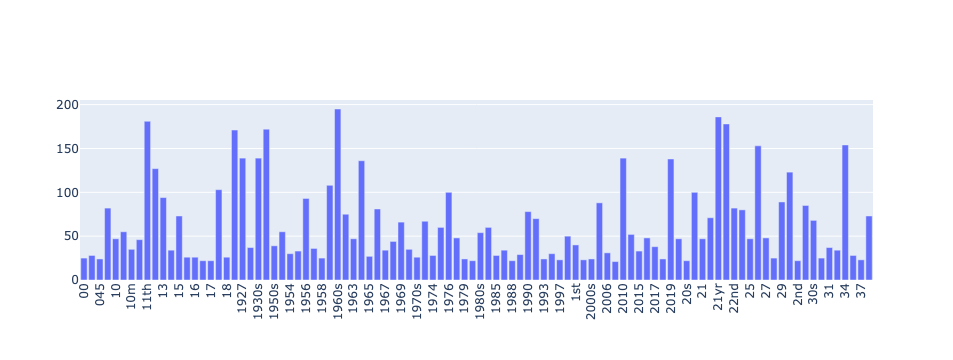

In [19]:
# Filter term frequencies
term_frequencies_new = np.array([x for x in term_frequencies if 200 > x > 20])
# Bar chart with Plotly
fig = go.Figure([go.Bar(x = count_vect.get_feature_names_out()[:300], y = term_frequencies_new[:100])])
fig.update_layout(xaxis_tickangle = -90)
fig.show()

**Exercise 14**: Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called long tail (get familiar with this term since it will appear a lot in data mining and other statistics courses). 

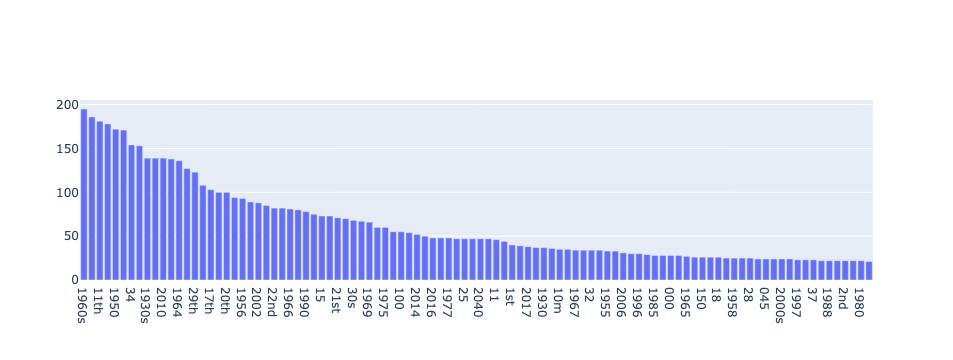

In [20]:
# Extract x & y values
x_values = count_vect.get_feature_names_out()[:100]
y_values = term_frequencies_new[:100]
# Sort x & y values based on sorted_indices
sorted_indices = np.argsort(y_values)[::-1]
sorted_x = np.array(x_values)[sorted_indices]
sorted_y = np.array(y_values)[sorted_indices]
# Bar chart
fig = go.Figure([go.Bar(x = sorted_x, y = sorted_y)])
fig.show()

**Exercise 15**: You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

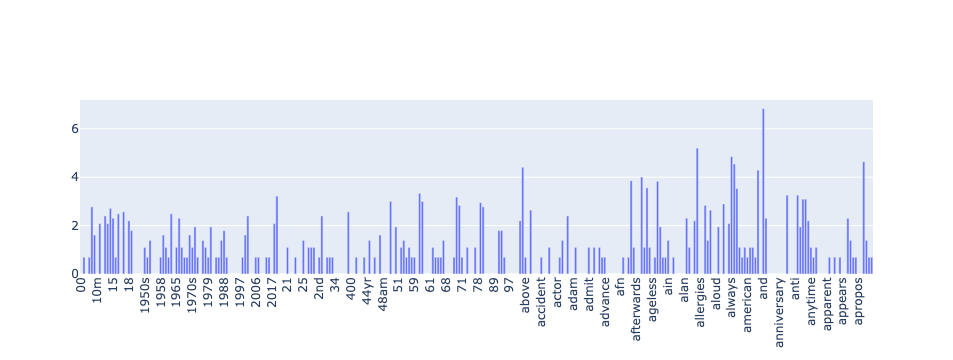

In [21]:
# Log distribution
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
# Bar plot
fig = go.Figure([go.Bar(x = count_vect.get_feature_names_out()[:300], y = term_frequencies_log[:300])])
fig.update_layout(xaxis_tickangle = -90)
fig.show()

**Exercise 16**: Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Create separate DataFrames for each category
sentiments = df_pd['sentiment'].unique()  # Get unique category labels
sentiment_dfs = {}  # Dictionary to store DataFrames for each category

for sentiment in sentiments:
    # Filter the original DataFrame by category
    sentiment_dfs[sentiment] = df_pd[df_pd['sentiment'] == sentiment].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    df_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(df_counts.toarray(), columns = words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for sentiment in sentiments:
    term_document_dfs[sentiment] = create_term_document_df(sentiment_dfs[sentiment])

In [23]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
sentiment_number = 0
print(f"Filtered Term-Document Frequency DataFrame for Sentiment {sentiments[sentiment_number]}:")
term_document_dfs[sentiments[sentiment_number]]

Filtered Term-Document Frequency DataFrame for Sentiment not nostalgia:


00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   
748   0    0    0   0    0    0   0   0   0   0  ...         0           0   
749   0    0    0   0    0    0   0   0   0   0  ...         0           0   

     your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0       0         0      0        0    0    0        0      0  
1       0         0      0        0    0    0        0      0  
2       0         0      0        0    0    0        0      0  
3       0         0      0        0    0    0        0      0  
4       0         0      0        0    0    0        0      0  
..    ...       ...    ...      ...  ...  ...      ...    ...  
745     0         0      0        0    0    0        0      0  
746     0         0      0        0    0    0        0      0  
747     0         0      0        0    0    0        0      0  
748     1         0      0        0    0    0        0      0  
749     0         0      0        0    0    0        0      0  

[750 rows x 2602 columns]

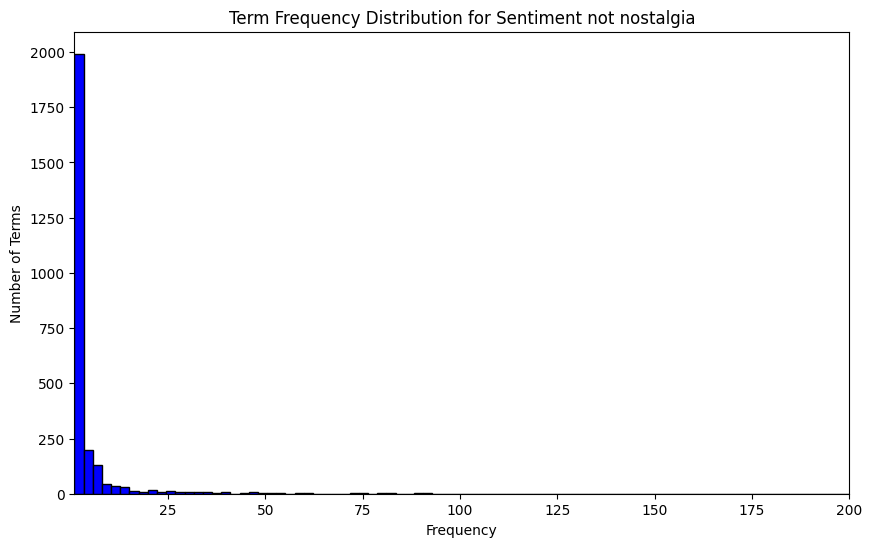

In [24]:
# Sum over all documents to get total frequency for each word
category_number = 0
word_counts = term_document_dfs[sentiments[sentiment_number]].sum(axis = 0).to_numpy()

# Visualize the frequency distribution
plt.figure(figsize = (10, 6))
plt.hist(word_counts, bins = 300, color = 'blue', edgecolor = 'black')
plt.title(f'Term Frequency Distribution for Sentiment {sentiments[sentiment_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [25]:
# Top 5% results
# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in top_5_percent_indices]

print(f"Category: {sentiments[sentiment_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['00', 'graphics', 'granted', 'grannys', 'grandsons', 'grandma', 'grandfathers', 'grandchildren', 'grandchild', 'gramaphone', 'graffiti', 'grade', 'great', 'grace', 'got', 'goosebumps', 'goodnight', 'goodness', 'gone', 'gold', 'going', 'goes', 'glitter', 'glimpses', 'glass', 'grabbed', 'glasgow', 'greater', 'greats', 'happiest', 'happening', 'happened', 'hansen', 'hanging', 'hanged', 'hang', 'handball', 'hand', 'hall', 'hadn', 'greatest', 'guy', 'gulf', 'guitarist', 'guess', 'guardhouse', 'guaranteed', 'growing', 'group', 'grocery', 'griffiths', 'greg', 'green', 'gut', 'glad', 'giving', 'gives', 'fresh', 'freedom', 'free', 'francisco', 'frames', 'found', 'fossils', 'forwards', 'forward', 'form', 'fork', 'front', 'forgive', 'ford', 'for', 'fool', 'following', 'follow', 'flying', 'floyd', 'flowing', 'flower', 'flowed', 'florida', 'forehead', 'fulfill', 'fully', 'funerals', 'given', 'give', 'gift', 'gf', 'gets', 'germa

In [26]:
# Bottom 1% results
# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in bottom_1_percent_indices]

print(f"Category: {sentiments[sentiment_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['00', 'graphics', 'granted', 'grannys', 'grandsons', 'grandma', 'grandfathers', 'grandchildren', 'grandchild', 'gramaphone', 'graffiti', 'grade', 'great', 'grace', 'got', 'goosebumps', 'goodnight', 'goodness', 'gone', 'gold', 'going', 'goes', 'glitter', 'glimpses', 'glass', 'grabbed']


We can observe that the top 5% indices contain 130 words, while the bottom 1% indices contain 26 words.

In [27]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent = 0.05, bottom_percent = 0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis = 0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns = words_to_remove)

# Apply the filtering function to each category
filtered_term_document_dfs = {}

for sentiment in sentiments:
    filtered_term_document_dfs[sentiment] = filter_top_bottom_words_by_sum(term_document_dfs[sentiment])
term_document_dfs = filtered_term_document_dfs
# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiments[sentiment_number]}:")
filtered_term_document_dfs[sentiments[sentiment_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


000  045  10  100  10m  11  12  14  15  150  ...  younger  youngest  \
0      0    0   0    0    0   0   0   0   0    0  ...        0         0   
1      0    0   0    0    0   0   0   0   0    0  ...        0         0   
2      0    0   0    0    0   0   0   0   0    0  ...        0         0   
3      0    0   0    0    0   0   0   0   0    0  ...        0         0   
4      0    0   0    0    0   0   0   0   0    0  ...        0         0   
..   ...  ...  ..  ...  ...  ..  ..  ..  ..  ...  ...      ...       ...   
745    0    0   0    0    0   0   0   0   0    0  ...        0         0   
746    0    0   0    0    0   0   0   0   0    0  ...        0         0   
747    0    0   0    0    0   0   0   0   0    0  ...        0         0   
748    0    0   0    0    0   0   0   0   0    0  ...        0         0   
749    0    0   0    0    0   0   0   0   0    0  ...        0         0   

     youngsters  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0             0         0      0        0    0    0        0      0  
1             0         0      0        0    0    0        0      0  
2             0         0      0        0    0    0        0      0  
3             0         0      0        0    0    0        0      0  
4             0         0      0        0    0    0        0      0  
..          ...       ...    ...      ...  ...  ...      ...    ...  
745           0         0      0        0    0    0        0      0  
746           0         0      0        0    0    0        0      0  
747           0         0      0        0    0    0        0      0  
748           0         0      0        0    0    0        0      0  
749           0         0      0        0    0    0        0      0  

[750 rows x 2446 columns]

In [28]:
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for sentiment in term_document_dfs:    
    # Replace dots with underscores in the category name to avoid errors in the file creation
    sentiment_safe = sentiment.replace(' ', '_')
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[sentiment])
    obj.convert2TransactionalDatabase(f'td_freq_db_{sentiment_safe}.csv', '>=', 1)

In [29]:
print(term_document_dfs)

{'not nostalgia':      000  045  10  100  10m  11  12  14  15  150  ...  younger  youngest  \
0      0    0   0    0    0   0   0   0   0    0  ...        0         0   
1      0    0   0    0    0   0   0   0   0    0  ...        0         0   
2      0    0   0    0    0   0   0   0   0    0  ...        0         0   
3      0    0   0    0    0   0   0   0   0    0  ...        0         0   
4      0    0   0    0    0   0   0   0   0    0  ...        0         0   
..   ...  ...  ..  ...  ...  ..  ..  ..  ..  ...  ...      ...       ...   
745    0    0   0    0    0   0   0   0   0    0  ...        0         0   
746    0    0   0    0    0   0   0   0   0    0  ...        0         0   
747    0    0   0    0    0   0   0   0   0    0  ...        0         0   
748    0    0   0    0    0   0   0   0   0    0  ...        0         0   
749    0    0   0    0    0   0   0   0   0    0  ...        0         0   

     youngsters  yourself  youth  youtube  yrs  yuo  zealand  zulus  

Database size (total no of transactions) : 746
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.402144772117962
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.950348241365226
Variance in Transaction Sizes : 35.45416989042229
Sparsity : 0.9965649449010148


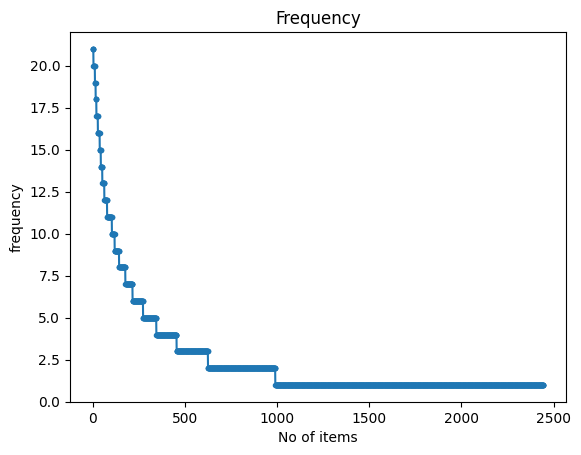

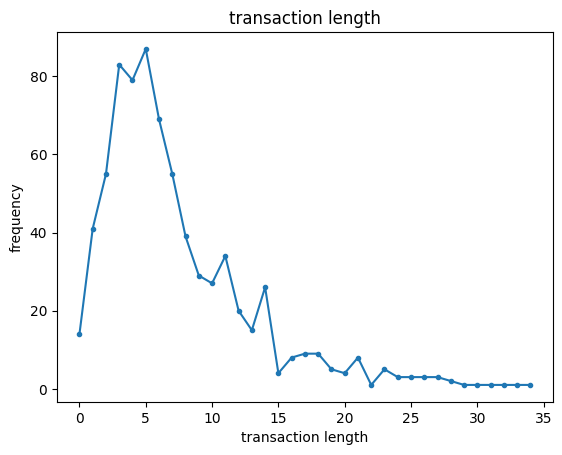

In [30]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.103722524357735
Sparsity : 0.9959733855996001


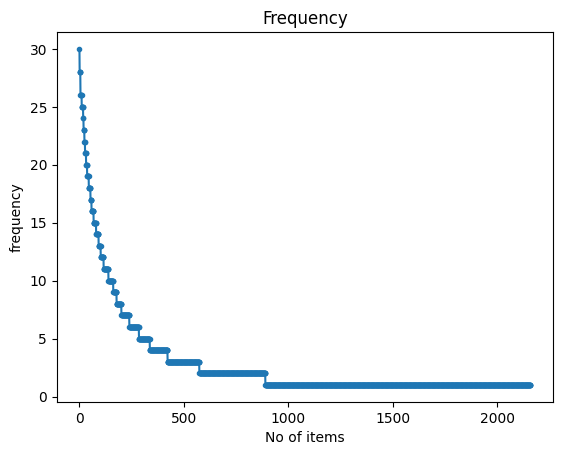

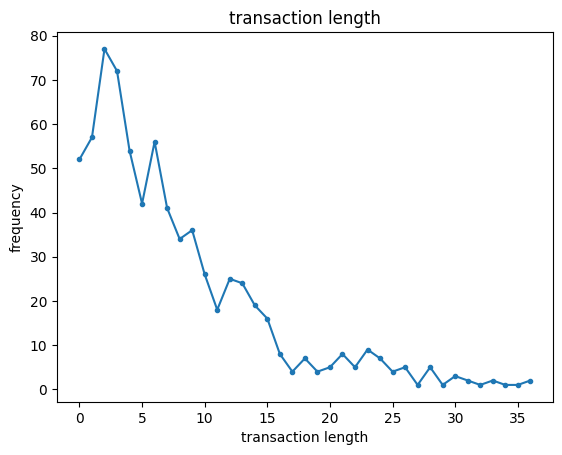

In [31]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

**Exercise 17**: Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance.
I use `nostalgia` instead

In [59]:
# FAE Top-K
from PAMI.frequentPattern.topk import FAE as alg
import gc  # import the garbage collector module
# FAE Top-K for k = 500
k = 500
obj1 = alg.FAE(iFile = 'td_freq_db_nostalgia.csv', k = k) # analyse comp.graphics using FAE
obj1.mine()
topKFrequentPatterns1 = obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(topKFrequentPatterns1))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) # measure the runtime

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 500
Runtime: 0.08833789825439453


In [ ]:
# FAE Top-K for k = 1000
k = 1000
obj2 = alg.FAE(iFile = 'td_freq_db_nostalgia.csv', k = k) # analyse comp.graphics using FAE
obj2.mine()
topKFrequentPatterns2 = obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(topKFrequentPatterns2))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) # measure the runtime

In [ ]:
# FAE Top-K for k = 1500
k = 1500
obj3 = alg.FAE(iFile = 'td_freq_db_nostalgia.csv', k = k) # analyse comp.graphics using FAE
obj3.mine()
topKFrequentPatterns3 = obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(topKFrequentPatterns3))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) # measure the runtime

In [36]:
# MaxFPGrowth
from PAMI.frequentPattern.maximal import MaxFPGrowth as algobj
minSup = 3
obj4 = algobj.MaxFPGrowth(iFile = 'td_freq_db_nostalgia.csv', minSup = minSup)
obj4.mine()
frequentPatterns1 = obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatterns1))) #print the total number of patterns 
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime

minSup = 6
obj5 = algobj.MaxFPGrowth(iFile = 'td_freq_db_nostalgia.csv', minSup = minSup)
obj5.mine()
frequentPatterns2 = obj5.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatterns2))) #print the total number of patterns 
print('Runtime: ' + str(obj5.getRuntime())) #measure the runtime

minSup = 9
obj6 = algobj.MaxFPGrowth(iFile = 'td_freq_db_nostalgia.csv', minSup = minSup)
obj6.mine()
frequentPatterns3 = obj6.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatterns3))) #print the total number of patterns 
print('Runtime: ' + str(obj6.getRuntime())) #measure the runtime

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 682
Runtime: 0.033480167388916016
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 274
Runtime: 0.048483848571777344
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 176
Runtime: 0.010297298431396484


**Exercise 18**: Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.
Since there are only 2 categories (nostalgia & not nostalgia), it is no need to draw a 3-D plot, so I draw a 2-D plot instead.

In [38]:
# Find unique patterns
import pandas as pd
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup = 9
obj7 = alg.FPGrowth(iFile = 'td_freq_db_nostalgia.csv', minSup = minSup)
obj7.mine()
frequentPatternsDF_nostalgia = obj7.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) # print the total number of patterns
print('Runtime: ' + str(obj7.getRuntime())) # measure the runtime
obj7.save('frequentPatternsDF_nostalgia.txt') # save the patterns

obj8 = alg.FPGrowth(iFile = 'td_freq_db_not_nostalgia.csv', minSup = minSup)
obj8.mine()
frequentPatternsDF_not_nostalgia = obj8.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) # print the total number of patterns
print('Runtime: ' + str(obj8.getRuntime())) # measure the runtime
obj8.save('frequentPatternsDF_not_nostalgia.txt') # save the patterns

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.01384425163269043
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.008334159851074219


In [39]:
# We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index = True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by = 'Support', ascending = False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

     Patterns  Support
127      will       28
126     would       28
125      ever       28
123        or       26
120       kid       26
..        ...      ...
142  handsome        9
143   perfect        9
144        ll        9
145     happy        9
0         its        9

[220 rows x 2 columns]
Number of patterns discarded: 104


In [40]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
df_tdm = count_vect.fit_transform(df_pd['comment'])  # text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df_pd['tokenized_text'] = df_pd['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index = df_pd.index, columns = final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df_pd['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(df_tdm.toarray(), columns = terms, index = df_pd.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis = 1)

In [41]:
# Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Apply PCA, t-SNE, and UMAP to the data
df_pca_tdm = PCA(n_components = 2).fit_transform(tdm_df.values)
df_tsne_tdm = TSNE(n_components = 2).fit_transform(tdm_df.values)
df_umap_tdm = umap.UMAP(n_components = 2).fit_transform(tdm_df.values)

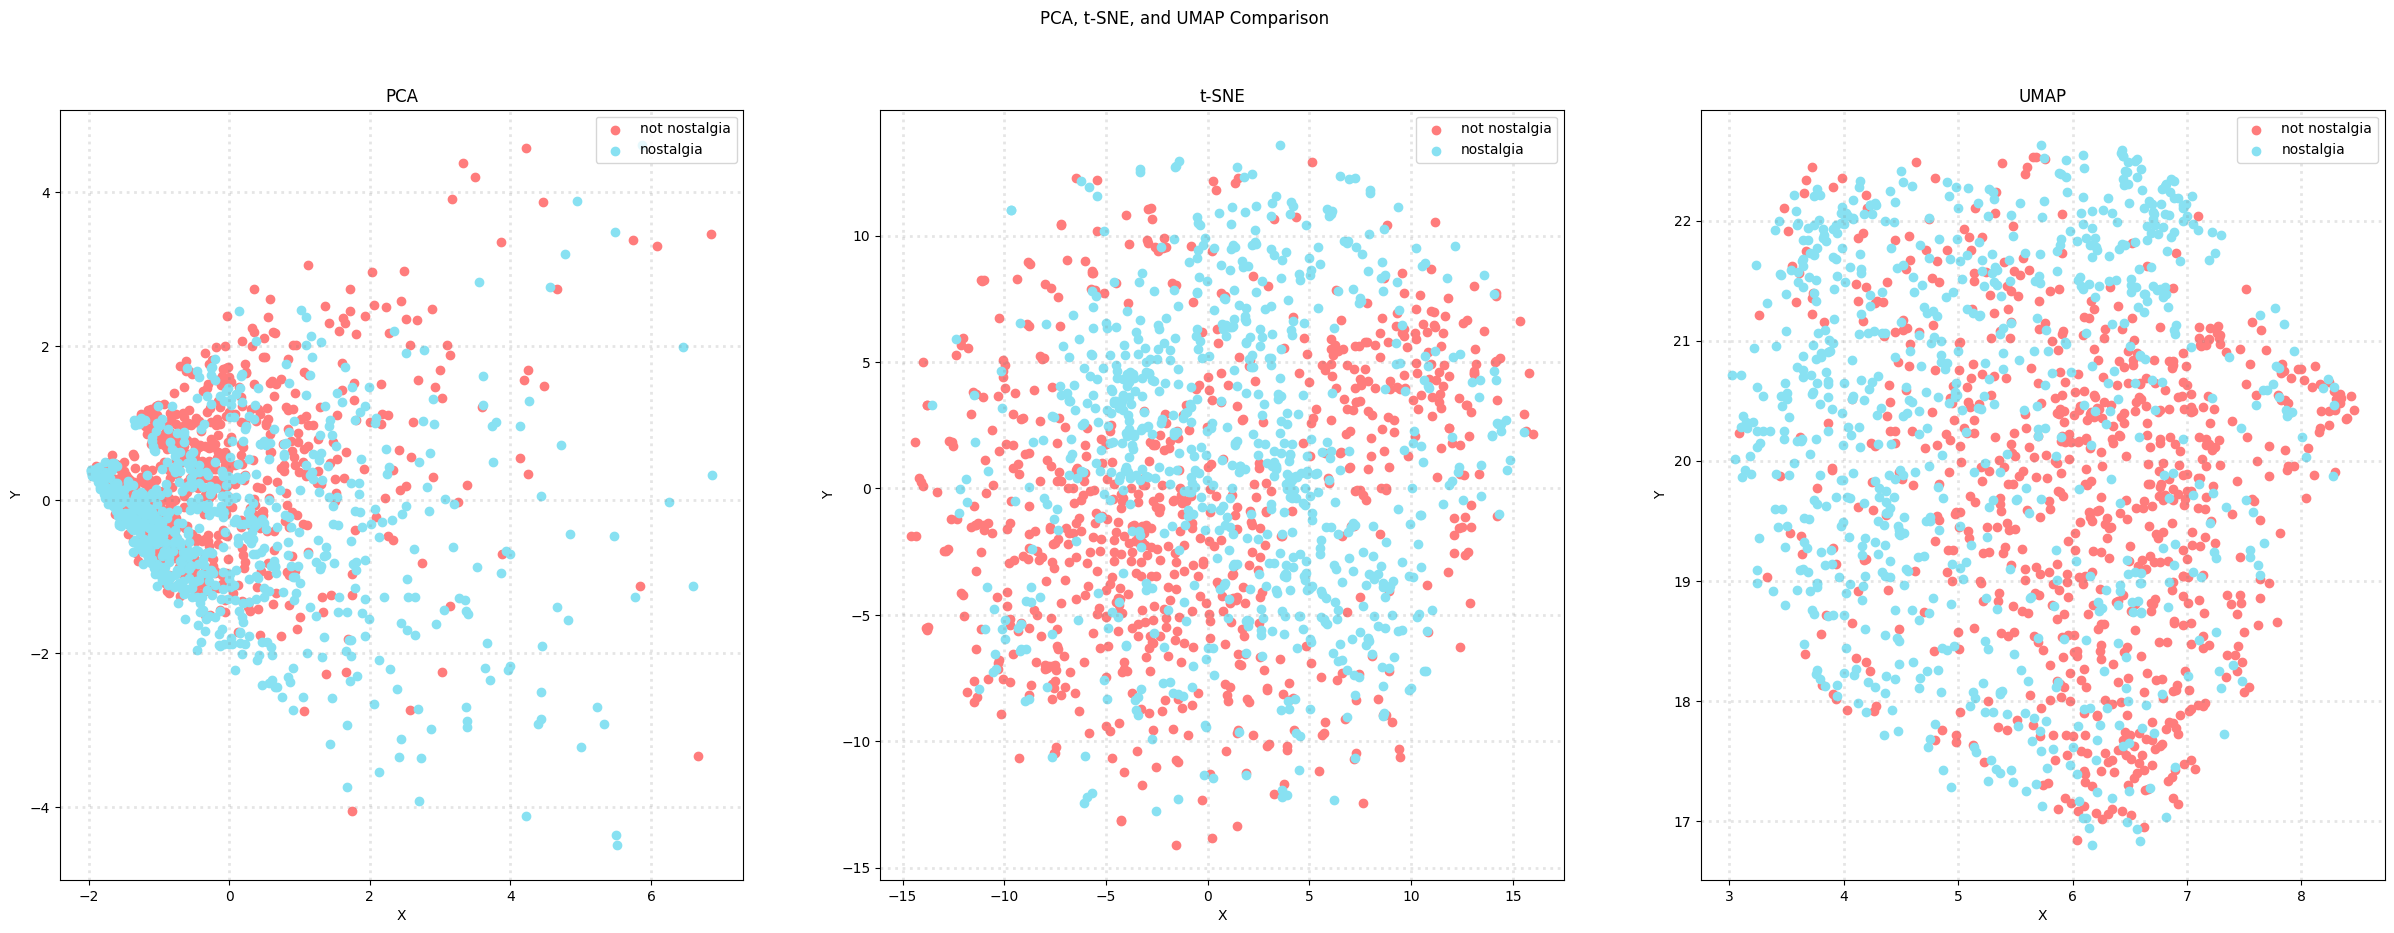

In [42]:
# Plot the results in subplots
col = ['#FF7C7C', '#88E1F2']
categories = df_pd['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize = (30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, df_reduced, title):
    for c, category in zip(col, categories):
        xs = df_reduced[df_pd['sentiment'] == category].T[0]
        ys = df_reduced[df_pd['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c = c, marker = 'o', label = category)
    
    ax.grid(color = 'gray', linestyle = ':', linewidth = 2, alpha = 0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc = 'upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], df_pca_tdm, 'PCA')
plot_scatter(axes[1], df_tsne_tdm, 't-SNE')
plot_scatter(axes[2], df_umap_tdm, 'UMAP')

plt.show()

**Exercise 19**: Try to generate the binarization using the `category_name` column instead. Does it work?
I use `sentiment` instead.

In [43]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df_pd.sentiment)

LabelBinarizer()

In [44]:
df_pd['bin_sentiment'] = mlb.transform(df_pd['sentiment']).tolist()
df_pd[0:9]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   

                                            unigrams  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4  [listening, to, his, songs, reminds, me, of, m...   
5  [Every, time, I, heard, this, song, as, a, chi...   
6  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8   [Wherever, you, are, you, always, in, my, heart]   

                                      tokenized_text bin_sentiment  
0  {Reeves, many, golden, for, Thank, days, you, ...           [1]  
1  {when, love, voice, I, his, forgotten, angel, ...           [0]  
2  {Reeves, forgot, pretensions, graduated, aroun...           [0]  
3  {came, 47, for, when, Thank, you, all, back, c...           [1]  
4  {to, who, reminds, his, him, played, listening...           [0]  
5  {many, song., Every, time, souls., touches, ch...           [0]  
6  {for, when, Time, back, teenager, dad, My, Ree...           [0]  
7  {Reeves, he, am, love, childhood, the, I, his,...           [0]  
8        {are, Wherever, always, you, my, heart, in}           [1]

### Third

1. Generate meaningful new **data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.

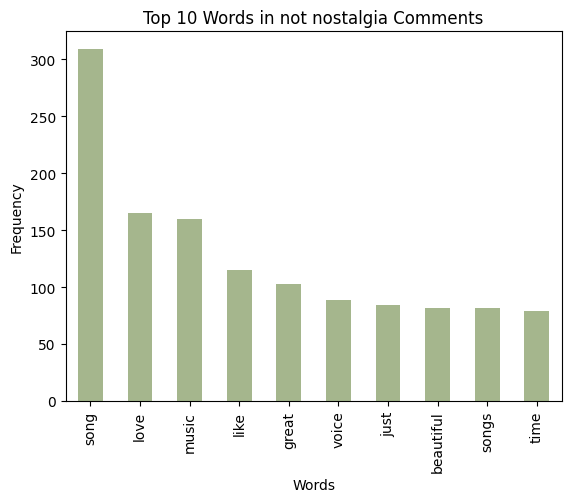

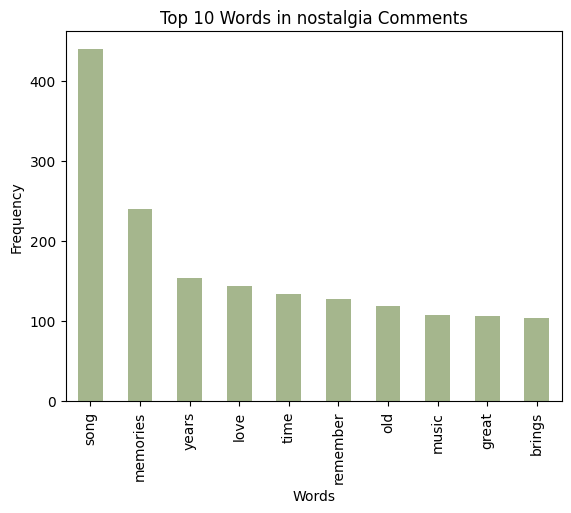

In [45]:
# Bar plot
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Vectorize and count word frequencies for each sentiment class
vectorizer = CountVectorizer(stop_words = 'english')
for sentiment in sentiments:
    comments = ds['train'].filter(lambda x: x['sentiment'] == sentiment)['comment']
    X = vectorizer.fit_transform(comments)
    word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    top_words = word_counts.sum().nlargest(10)
    
    # Plot top 10 words
    top_words.plot(kind = 'bar', color = '#A5B68D')
    plt.title(f'Top 10 Words in {sentiment} Comments')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

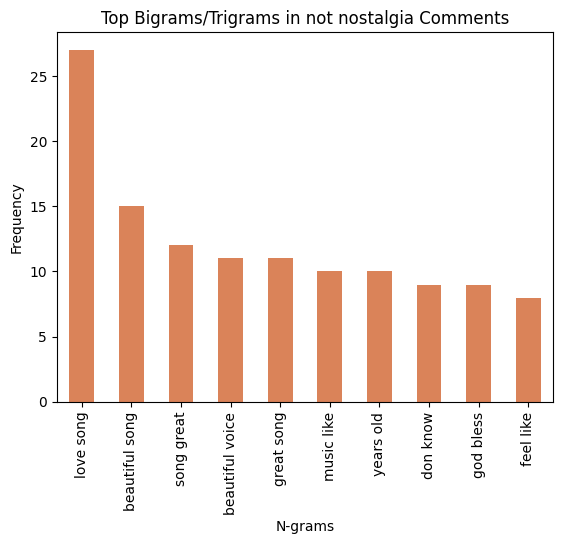

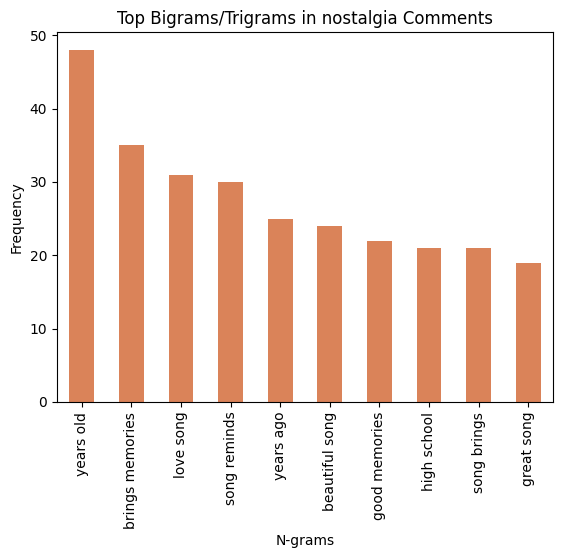

In [46]:
# Bigrams
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range = (2, 3), stop_words = 'english')

for sentiment in sentiments:
    comments = ds['train'].filter(lambda x: x['sentiment'] == sentiment)['comment']
    X = vectorizer.fit_transform(comments)
    ngrams = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())
    top_ngrams = ngrams.sum().nlargest(10)
    
    top_ngrams.plot(kind = 'bar', color = '#DA8359')
    plt.title(f'Top Bigrams/Trigrams in {sentiment} Comments')
    plt.xlabel('N-grams')
    plt.ylabel('Frequency')
    plt.show()

2. Generate **TF-IDF** features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn guide.

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
texts = ds['train']['comment']
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(texts)
tfidf_dense = tfidf_matrix.toarray()
feature_names = vectorizer.get_feature_names_out()
df = pd.DataFrame(tfidf_dense, columns = feature_names)
print(tfidf_dense)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


3. Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences. Refer to this article.

In [48]:
# Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
sentiment_mapping = dict(zip(df_pd['sentiment'].drop_duplicates(), df_pd['sentiment'].drop_duplicates()))

# Convert the numerical category labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df_pd['sentiment'], test_size = 0.3, random_state = 42)

In [88]:
# Train the Naive Bayes classifier for document term frequency data
nb_classifier1 = MultinomialNB()
nb_classifier1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier1.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names = target_names, digits = 4))

Accuracy: 0.8422222222222222

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.7917    0.9289    0.8548       225
not nostalgia     0.9140    0.7556    0.8273       225

     accuracy                         0.8422       450
    macro avg     0.8528    0.8422    0.8410       450
 weighted avg     0.8528    0.8422    0.8410       450



In [49]:
# Model with TF-IDF data
labels = ds['train']['sentiment']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, labels, test_size = 0.3, random_state = 42)

In [50]:
# Train the Naive Bayes classifier for TF-IDF data
nb_classifier2 = MultinomialNB()
nb_classifier2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier2.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names = target_names, digits = 4))

Accuracy: 0.8488888888888889

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.7985    0.9333    0.8607       225
not nostalgia     0.9198    0.7644    0.8350       225

     accuracy                         0.8489       450
    macro avg     0.8591    0.8489    0.8478       450
 weighted avg     0.8591    0.8489    0.8478       450



### Fourth
In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

From the **data preprocessing** process, there are some ways to simplify the process:
1. Attribute Transformation and Frequent Patterns Visualisation
* Simplified term frequency calculation: `np.array(X_counts.sum(axis=0)).flatten()` efficiently sums the columns and directly creates the term frequencies
* Dictionary comprehensions: `category_dfs` and `term_document_dfs`
* Log transformation: `np.log(term_frequencies + 1)` avoids potential issues with zero values
* Histogram (the last one): reduce bins from 5000 to 500 for readability

In [52]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import helpers.data_mining_helpers as dmh
from sklearn.feature_extraction.text import CountVectorizer
import math
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset = 'train', categories = categories,
                                  shuffle = True, random_state = 42) 
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns = ['text'])
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X['text'])

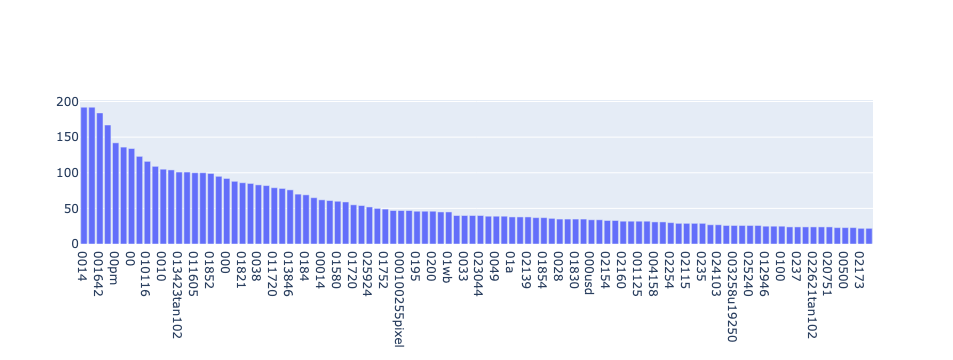

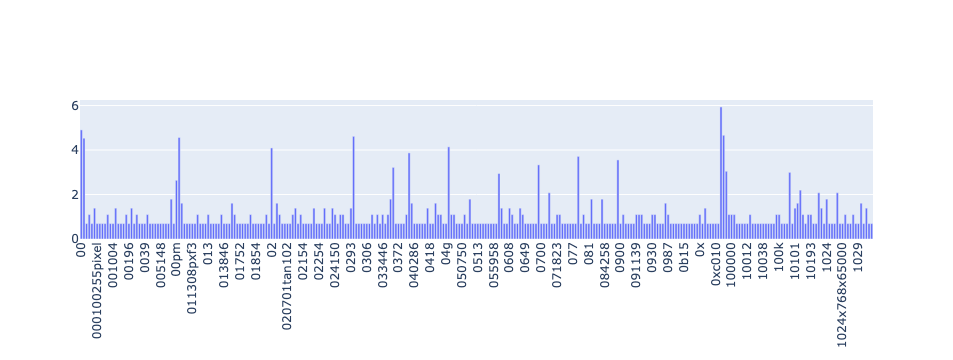

In [53]:
# Simplified term frequency calculation
term_frequencies = np.array(X_counts.sum(axis = 0)).flatten()  # Flatten after summing

# Filter term frequencies and extract top values
term_frequencies_new = term_frequencies[(term_frequencies < 200) & (term_frequencies > 20)]
x_values = count_vect.get_feature_names_out()[:100]
y_values = term_frequencies_new[:100]

# Sort x and y values based on sorted indices
sorted_indices = np.argsort(y_values)[::-1]
sorted_x = x_values[sorted_indices]
sorted_y = y_values[sorted_indices]

# Create and display bar chart with Plotly
fig = go.Figure([go.Bar(x = sorted_x, y = sorted_y)])
fig.show()

# Log transform term frequencies for visualization
term_frequencies_log = np.log(term_frequencies + 1)  # Adding 1 to avoid log(0)
fig = go.Figure([go.Bar(x=count_vect.get_feature_names_out()[:300], y = term_frequencies_log[:300])])
fig.update_layout(xaxis_tickangle = -90)
fig.show()

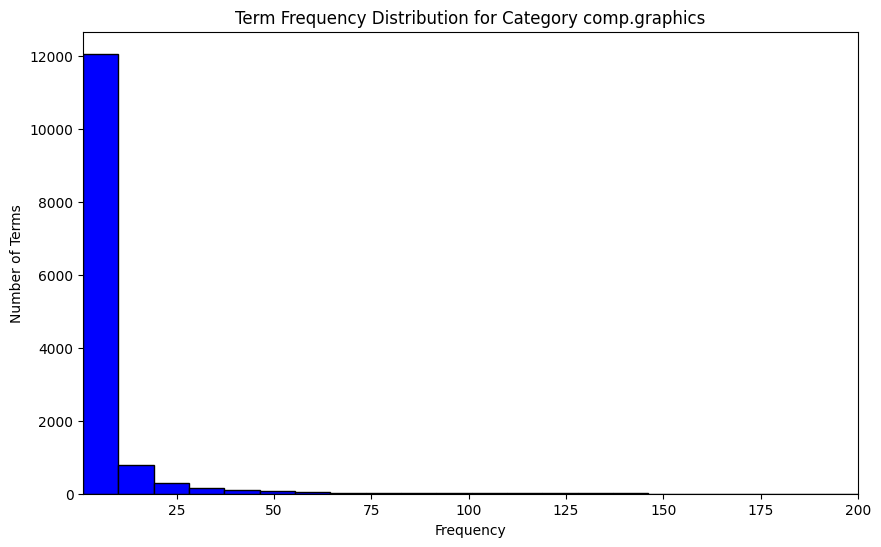

In [55]:
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

# Separate DataFrames by category
categories = X['category_name'].unique()
category_dfs = {category: X[X['category_name'] == category].copy() for category in categories}

# Function to create term-document DataFrames for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(df['text'])
    return pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names_out())

# Generate term-document DataFrames per category in a dictionary
term_document_dfs = {category: create_term_document_df(df) for category, df in category_dfs.items()}

# Visualize the term frequency distribution for a selected category
category_number = 0  # can change it to 3
selected_category = categories[category_number]
word_counts = term_document_dfs[selected_category].sum(axis = 0).values

# Plot frequency distribution histogram
plt.figure(figsize = (10, 6))
plt.hist(word_counts, bins = 500, color = 'blue', edgecolor = 'black')  # Fewer bins for readability
plt.title(f'Term Frequency Distribution for Category {selected_category}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

2. Optimizing Text Classification by Filtering High and Low-Frequency Words
I do the following steps to optimize the process:
* Single function for top/bottom terms: `get_top_bottom_terms` extracts the top and bottom terms by frequency in one call
* Batch filter application: `filtered_term_document_dfs` applies `filter_top_bottom_words` to each category in one pass
* Efficient term removal: `words_to_remove` (using `np.union1d`) combines top and bottom terms to drop them from the dataframe in one step.

In [56]:
import numpy as np
import pandas as pd

# Function to get top/bottom N% terms by frequency
def get_top_bottom_terms(term_document_df, top_percent = 0.05, bottom_percent = 0.01):
    word_counts = term_document_df.sum(axis = 0).to_numpy()  # Sum across documents for each term
    total_terms = len(word_counts)
    
    # Calculate cutoff indices
    top_n_index = int(total_terms * top_percent)
    bottom_n_index = int(total_terms * bottom_percent)

    # Get sorted indices and filtered words
    sorted_indices = np.argsort(word_counts)
    top_indices = sorted_indices[-top_n_index:][::-1]  # Top 5%
    bottom_indices = sorted_indices[:bottom_n_index]  # Bottom 1%

    feature_names = term_document_df.columns.to_numpy()  # Get term names
    top_words = feature_names[top_indices]
    bottom_words = feature_names[bottom_indices]
    
    return top_words, bottom_words, len(top_words), len(bottom_words)

# Select one category for determining top/bottom term counts
category_number = 3
top_words, bottom_words, num_top, num_bottom = get_top_bottom_terms(term_document_dfs[categories[category_number]])

# Print the number of terms in top 5% and bottom 1% for one category
print(f"Number of terms in top 5%: {num_top}")
print(f"Number of terms in bottom 1%: {num_bottom}")

# Function to remove top/bottom terms from DataFrame
def filter_top_bottom_words(term_document_df, top_words, bottom_words):
    words_to_remove = np.union1d(top_words, bottom_words)
    existing_words_to_remove = [word for word in words_to_remove if word in term_document_df.columns]
    return term_document_df.drop(columns = existing_words_to_remove)

# Apply the filtering to each category
filtered_term_document_dfs = {
    category: filter_top_bottom_words(term_document_dfs[category], top_words, bottom_words)
    for category in categories
}

# Output
print(f"Filtered Term-Document Frequency DataFrame for Category '{categories[category_number]}':")
print(filtered_term_document_dfs[categories[category_number]])

Number of terms in top 5%: 598
Number of terms in bottom 1%: 119
Filtered Term-Document Frequency DataFrame for Category 'alt.atheism':
     00  000  000406  001125  01  0100  010116  011255  012536  013034  ...  \
0     0    0       0       0   0     0       0       0       0       0  ...   
1     0    0       0       0   0     0       0       0       0       0  ...   
2     0    0       0       0   0     0       0       0       0       0  ...   
3     0    0       0       0   0     0       0       0       0       0  ...   
4     0    0       0       0   0     0       0       0       0       0  ...   
..   ..  ...     ...     ...  ..   ...     ...     ...     ...     ...  ...   
475   0    0       0       0   0     0       0       0       0       0  ...   
476   0    0       0       0   0     0       0       0       0       0  ...   
477   0    0       0       0   0     0       0       0       0       0  ...   
478   0    0       0       0   0     0       0       0       0       0  ..

3. Comparison of Item Frequency Distribution and Transaction Length Distribution graphs
For this section, I use the following steps to simplify the process
* Single loop
* Dynamic naming: creating and analyzing each file in the same loop to reduce the need to handle individual files
* Clear variable naming: `db_obj` & `tds_obj` avoid overwriting variables

Database size (total no of transactions) : 584
Number of items : 13756
Minimum Transaction Size : 15
Average Transaction Size : 122.93493150684931
Maximum Transaction Size : 2603
Standard Deviation Transaction Size : 198.28098372213412
Variance in Transaction Sizes : 39382.784781127375
Sparsity : 0.9910631774129944
Database size (total no of transactions) : 599
Number of items : 13872
Minimum Transaction Size : 23
Average Transaction Size : 186.8380634390651
Maximum Transaction Size : 800
Standard Deviation Transaction Size : 117.46218296811692
Variance in Transaction Sizes : 13820.436943400651
Sparsity : 0.9865312814706556
Database size (total no of transactions) : 594
Number of items : 16257
Minimum Transaction Size : 24
Average Transaction Size : 166.67676767676767
Maximum Transaction Size : 1424
Standard Deviation Transaction Size : 162.6159360545957
Variance in Transaction Sizes : 26488.536154121313
Sparsity : 0.989747384654194
Database size (total no of transactions) : 480
Number

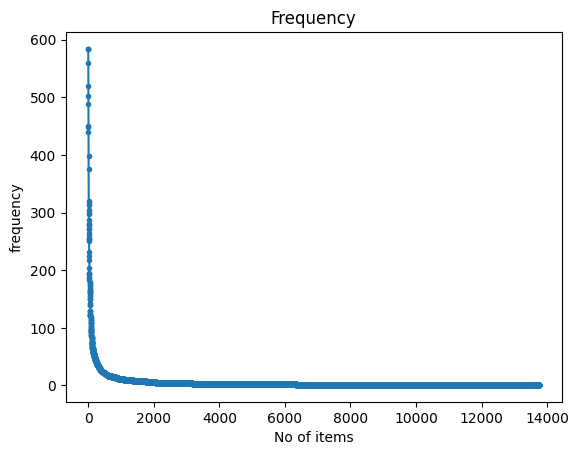

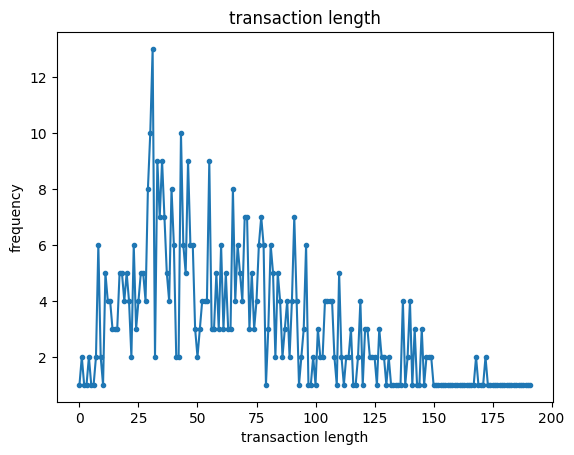

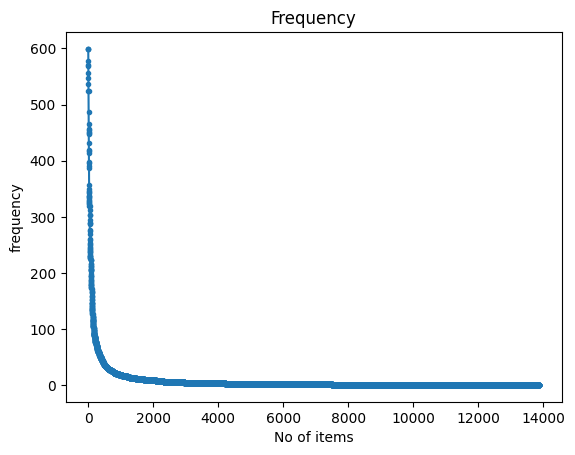

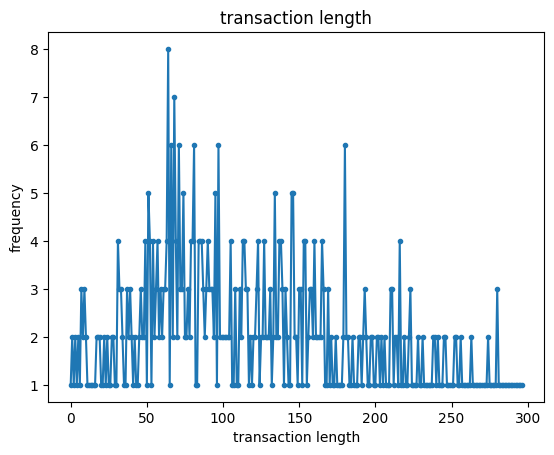

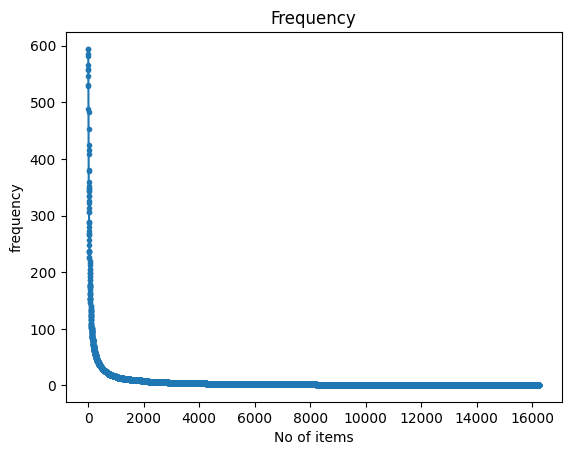

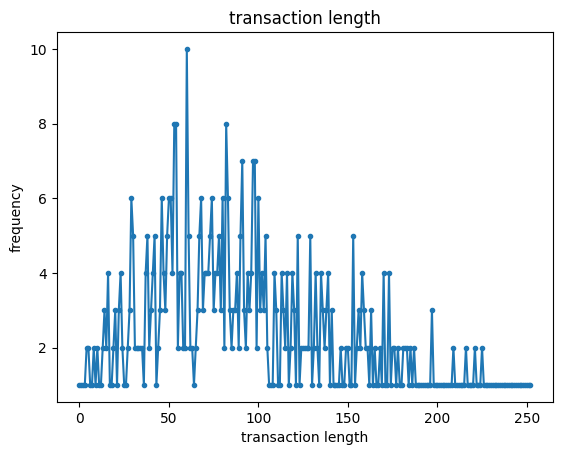

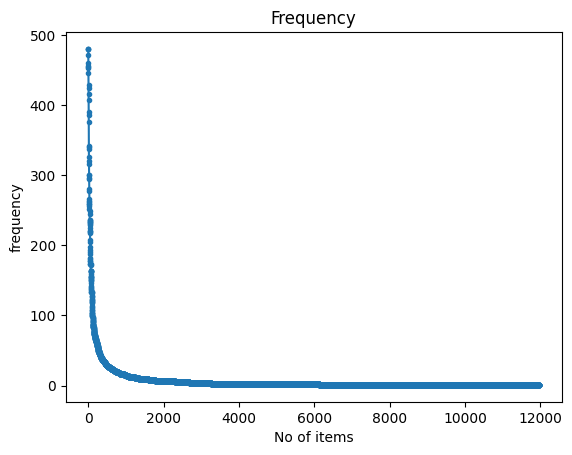

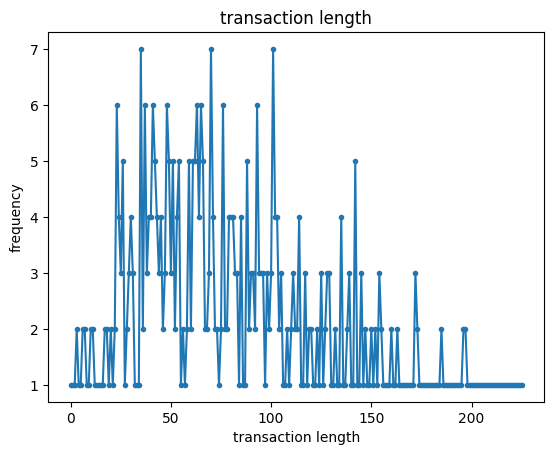

In [57]:
from PAMI.extras.DF2DB import DenseFormatDF as db
from PAMI.extras.dbStats import TransactionalDatabase as tds

# Loop through term-document DataFrames and process each category
for category, df in term_document_dfs.items():
    # Replace dots with underscores in the category name for safe file naming
    category_safe = category.replace('.', '_')
    
    # Convert DataFrame to transactional database
    db_obj = db.DenseFormatDF(df)
    file_name = f'td_freq_db_{category_safe}.csv'
    db_obj.convert2TransactionalDatabase(file_name, '>=', 1)
    
    # Perform statistical analysis on the created database file
    tds_obj = tds.TransactionalDatabase(file_name)
    tds_obj.run()
    tds_obj.printStats()
    tds_obj.plotGraphs()